In [1]:
%load_ext autoreload
%autoreload 2
%load_ext dotenv
%dotenv -o
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from pathlib import Path
import json
import numpy as np
import pandas as pd
import networkx as nx
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Descriptors import ExactMolWt,MolWt
from retrorules_gdr_2021.rule_burner import RuleBurner
from retrorules_gdr_2021.data import ExperimentalData, SubstrateData#, RuleData,ResultMatcher
from retrorules_gdr_2021.frag import Fragmenter
from retrorules_gdr_2021.workflow import Workflow, Step


logger set to DEBUG


<IPython.core.display.Javascript object>

In [3]:
# rules_path = "/home/yann/Data/RetroRules/retrorules_rr02_rp3_hs/retrorules_rr02_flat_all.tsv"
# rb = RuleBurner(rules_path=rules_path)

mgf_path = "/home/yann/Cloud/Pro/Projets/MetWork/Data/Sideritis/mgf_réseau_7fractions_Irlande.mgf"
exp_data = ExperimentalData(mgf_path)

<IPython.core.display.Javascript object>

In [4]:
input_smiles = [
    "[H]C1(OC2C(O)C(O)C(CO)OC2OC2=C(O)C3=C(C(O)=C2)C(=O)C=C(O3)C2=CC=C(O)C(O)=C2)OC(COC(C)=O)C(O)C(O)C1O",
    "CC(=O)OCC1OC(OC2C(O)C(O)C(CO)OC2OC2=C(O)C3=C(C(O)=C2)C(=O)C=C(O3)C2=CC=C(O)C=C2)C(O)C(O)C1O",
    "CC(=O)OCC1OC(OC2C(O)C(O)C(COC(C)=O)OC2OC2=C(O)C3=C(C(O)=C2)C(=O)C=C(O3)C2=CC=C(O)C(O)=C2)C(O)C(O)C1O",
    "[H]C1(OC2C(O)C(O)C(COC(C)=O)OC2OC2=C(O)C3=C(C(O)=C2)C(=O)C=C(O3)C2=CC=C(OC)C=C2)OC(COC(C)=O)C(O)C(O)C1O",
]

_input_smiles = [
    "[H]C1(OC2C(O)C(O)C(CO)OC2OC2=C(O)C3=C(C(O)=C2)C(=O)C=C(O3)C2=CC=C(O)C(O)=C2)OC(COC(C)=O)C(O)C(O)C1O"
]

result_smiles = [
    "OCC1OC(OC2C(O)C(O)C(CO)OC2Oc2cc(O)c3c(oc(cc3=O)-c3ccc(O)cc3)c2O)C(O)C(O)C1O",
    "COc1ccc(cc1)-c1cc(=O)c2c(O)cc(OC3OC(CO)C(O)C(O)C3OC3OC(COC(C)=O)C(O)C(O)C3O)c(O)c2o1",
    "COc1ccc(cc1O)-c1cc(=O)c2c(O)cc(OC3OC(CO)C(O)C(O)C3OC3OC(COC(C)=O)C(O)C(O)C3O)c(O)c2o1",
    "COc1ccc(cc1O)-c1cc(=O)c2c(O)cc(OC3OC(CO)C(O)C(O)C3OC3OC(COC(C)=O)C(O)C(O)C3O)c(O)c2o1",
    "COc1ccc(cc1O)-c1cc(=O)c2c(O)cc(OC3OC(COC(C)=O)C(O)C(O)C3OC3OC(COC(C)=O)C(O)C(O)C3O)c(O)c2o1",
]

input_scans = ["175", "168", "191", "190"]

result_scans = [
    "152",
    "173",
    "182",
    "186",
    "194",
]

<IPython.core.display.Javascript object>

In [5]:
annot_data = SubstrateData.load_smiles(input_smiles, scans=input_scans)
annot_data.df.head()

substrate_id                                   substrate_smiles  \
0             0  [H]C1(OC2C(O)C(O)C(CO)OC2OC2=C(O)C3=C(C(O)=C2)...   
1             1  CC(=O)OCC1OC(OC2C(O)C(O)C(CO)OC2OC2=C(O)C3=C(C...   
2             2  CC(=O)OCC1OC(OC2C(O)C(O)C(COC(C)=O)OC2OC2=C(O)...   
3             3  [H]C1(OC2C(O)C(O)C(COC(C)=O)OC2OC2=C(O)C3=C(C(...   

  substrate_scans           substrate_inchikey  
0             175  HLGKHCVGTSTFAJ-UHFFFAOYSA-N  
1             168  WINFSIMEBFWGGD-UHFFFAOYSA-N  
2             191  FTPMODVTXJGVCJ-UHFFFAOYSA-N  
3             190  IQDPCQNHHMHGJX-UHFFFAOYSA-N

<IPython.core.display.Javascript object>

In [6]:
wf = Workflow(
    annotation_data=annot_data,
    exp_data=exp_data,
    cosine_threshold=0.386,
    # min_diameter=[10, 10, 12],
    min_diameter=12,
)

<IPython.core.display.Javascript object>

In [7]:
wf.compute(5)
wf.export_graph(Path("data", "network3.json"))

##### Compute step 1 

### compute for diameter 16

load rules from /home/yann/Data/RetroRules/retrorules_rr02_rp3_hs/retrorules_rr02_flat_all.tsv
file_path /home/yann/Dev/MetWork/Analysis/retrorules-gdr-2021/notebooks/data/rule_burner_output-d179c4ba8f824b2f2cd8446fda8998ea.csv
Data loaded from saved file
rule_results : 24
new_structures : 24
ms1_matching : 6
ms1_scan_matching : 5
ms2_matching : 5
ms2_scan_matching : 4
ms2_scan_unique_matching : 3

### compute for diameter 14

file_path /home/yann/Dev/MetWork/Analysis/retrorules-gdr-2021/notebooks/data/rule_burner_output-69b8d4ef8512b6401d72402b5b8c0069.csv
Data loaded from saved file
rule_results : 44
new_structures : 44
ms1_matching : 8
ms1_scan_matching : 7
ms2_matching : 7
ms2_scan_matching : 6
ms2_scan_unique_matching : 5

### compute for diameter 12

file_path /home/yann/Dev/MetWork/Analysis/retrorules-gdr-2021/notebooks/data/rule_burner_output-4f0a26e701b48b6ea5ee95a9fa31f4b5.csv
Data loaded from saved file
rule_results : 434
n

<IPython.core.display.Javascript object>

In [18]:
wf.export_graph(Path("data", "network3.json"))

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 21 / 21
[t-SNE] Mean sigma: 0.743046
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.730738
[t-SNE] KL divergence after 3100 iterations: 0.056828


<IPython.core.display.Javascript object>

In [8]:
step = Step(wf, 1, annot_data)
step.compute(6, 16)



### compute for diameter 16

file_path /home/yann/Dev/MetWork/Analysis/retrorules-gdr-2021/notebooks/data/rule_burner_output-d179c4ba8f824b2f2cd8446fda8998ea.csv
Data loaded from saved file
rule_results : 24
new_structures : 24
ms1_matching : 6
ms1_scan_matching : 5
ms2_matching : 5
ms2_scan_matching : 4
ms2_scan_unique_matching : 3

### compute for diameter 14

file_path /home/yann/Dev/MetWork/Analysis/retrorules-gdr-2021/notebooks/data/rule_burner_output-69b8d4ef8512b6401d72402b5b8c0069.csv
Data loaded from saved file
rule_results : 44
new_structures : 44
ms1_matching : 8
ms1_scan_matching : 7
ms2_matching : 7
ms2_scan_matching : 6
ms2_scan_unique_matching : 5

### compute for diameter 12

file_path /home/yann/Dev/MetWork/Analysis/retrorules-gdr-2021/notebooks/data/rule_burner_output-4f0a26e701b48b6ea5ee95a9fa31f4b5.csv
Data loaded from saved file
rule_results : 434
new_structures : 426
ms1_matching : 14
ms1_scan_matching : 9
ms2_matching : 12
ms2_scan_matching : 8
ms2_scan_unique_m

<IPython.core.display.Javascript object>

In [28]:
step.plot_scans()

<IPython.core.display.Javascript object>

In [31]:
step.export_scans(str(Path("data", "fig.svg")), width=800, height=600)

<IPython.core.display.Javascript object>

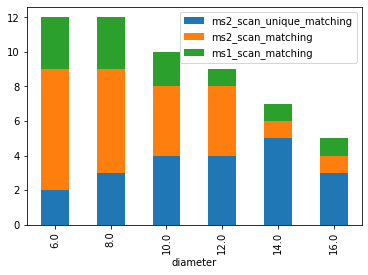

<IPython.core.display.Javascript object>

In [88]:
step.plot_scans()

In [79]:
import plotly.express as px

px.data.medals_wide()

nation  gold  silver  bronze
0  South Korea    24      13      11
1        China    10      15       8
2       Canada     9      12      12

<IPython.core.display.Javascript object>

In [84]:
from retrorules_gdr_2021.workflow import (
    SCAN_MS1_MATCHED,
    SCAN_MS2_MATCHED,
    SCAN_UNIQUE_MATCHED,
)

px.bar(
    step.scores,
    x="diameter",
    y=[
        SCAN_UNIQUE_MATCHED,
        SCAN_MS2_MATCHED,
        SCAN_MS1_MATCHED,
    ],
)

<IPython.core.display.Javascript object>

In [76]:
step.scores

diameter  rule_results  new_structures  ms1_matching  ms1_scan_matching  \
16      16.0          24.0            24.0           6.0                5.0   
14      14.0          44.0            44.0           8.0                7.0   
12      12.0         434.0           426.0          14.0                9.0   
10      10.0         953.0           939.0          15.0               10.0   
8        8.0        2407.0          2391.0          46.0               12.0   
6        6.0       10595.0         10477.0          62.0               12.0   

    ms2_matching  ms2_scan_matching  ms2_scan_unique_matching  
16           5.0                4.0                       3.0  
14           7.0                6.0                       5.0  
12          12.0                8.0                       4.0  
10          12.0                8.0                       4.0  
8           23.0                9.0                       3.0  
6           35.0                9.0                       2.0

<IPython.core.display.Javascript object>

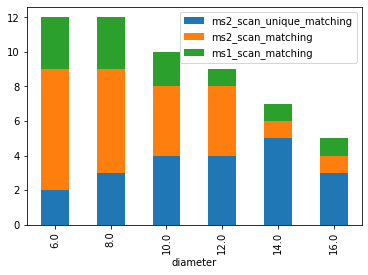

<IPython.core.display.Javascript object>

In [37]:
wf.plot_scans()

In [83]:
wf.compute(8, 16)
wf.create_graph()
wf.export_graph(Path("data", "network2.json"))


### compute for diameter 16

file_path /home/yann/Dev/MetWork/Analysis/retrorules-gdr-2021/notebooks/data/rule_burner_output-d179c4ba8f824b2f2cd8446fda8998ea.csv
Data loaded from saved file
rule_results : 24
new_structures : 24
ms1_matching : 6
ms1_scan_matching : 5
PTKNECMMKRDZEG-UHFFFAOYSA-N already fraged
JXIPMRDWQSYZND-UHFFFAOYSA-N already fraged
JXIPMRDWQSYZND-UHFFFAOYSA-N already fraged
IKSMYAFBURMXFU-UHFFFAOYSA-N already fraged
NXDNDRJNQJPXGJ-UHFFFAOYSA-N already fraged
PWOFHOJJMWJGLT-UHFFFAOYSA-N already fraged
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor

file_path /home/yann/Dev/MetWork/Analysis/retrorules-gdr-2021/notebooks/data/rule_burner_output-e219449e979d3192d6281f7e8879649a.csv
Data loaded from saved file
rule_results : 953
new_structures : 939
ms1_matching : 15
ms1_scan_matching : 10
LORXOTCKKVEWGS-UHFFFAOYSA-N already fraged
ZXQCHXLLIKMUTB-UHFFFAOYSA-N already fraged
NXDNDRJNQJPXGJ-UHFFFAOYSA-N already fragedPWOFHOJJMWJGLT-UHFFFAOYSA-N already fraged

FTPMODVTXJGVCJ-UHFFFAOYSA-N already fragedHLGKHCVGTSTFAJ-UHFFFAOYSA-N already fragedPTKNECMMKRDZEG-UHFFFAOYSA-N already fraged
HLGKHCVGTSTFAJ-UHFFFAOYSA-N already fraged

JXIPMRDWQSYZND-UHFFFAOYSA-N already fraged
IKSMYAFBURMXFU-UHFFFAOYSA-N already fragedJXIPMRDWQSYZND-UHFFFAOYSA-N already fraged
ZOIVTTBRLWZSAT-UHFFFAOYSA-N already fragedAXVCPTNYJJWIRE-UHFFFAOYSA-N already fraged
OSJPPGNTCRNQQC-UHFFFAOYSA-N already fraged


WINFSIMEBFWGGD-UHFFFAOYSA-N already fraged

No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No pre

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 17 / 17
[t-SNE] Mean sigma: 0.116867
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.491818
[t-SNE] KL divergence after 2450 iterations: 0.057253


<IPython.core.display.Javascript object>

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 27 / 27
[t-SNE] Mean sigma: 0.169749
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.017979
[t-SNE] KL divergence after 12000 iterations: 0.092925


<IPython.core.display.Javascript object>

In [56]:
sorted(wf.graph_df.columns)

['# Rule_ID',
 'Diameter',
 'Legacy_ID',
 'Product_IDs',
 'Product_SMILES',
 'Reaction_EC_number',
 'Reaction_ID',
 'Reaction_direction',
 'Rule_SMARTS',
 'Rule_SMARTS_lite',
 'Rule_SMILES',
 'Rule_order',
 'Rule_relative_direction',
 'Rule_usage',
 'Score',
 'Score_normalized',
 'Substrate_ID',
 'Substrate_SMILES',
 'cosine',
 'product_exact_mass',
 'product_inchikeys',
 'product_inchis',
 'product_smiles',
 'rule_id',
 'scans',
 'substrate_id',
 'substrate_inchikey',
 'substrate_scans',
 'substrate_smiles']

<IPython.core.display.Javascript object>

In [58]:
columns = list(set(df.columns) - {"Diameter"})
df.groupby(columns).max().reset_index()

product_inchikeys     Score Reaction_ID Substrate_ID  \
0   AXVCPTNYJJWIRE-UHFFFAOYSA-N  0.000000  MNXR108274     MNXM1086   
1   AXVCPTNYJJWIRE-UHFFFAOYSA-N  0.000000  MNXR108274     MNXM1086   
2   AXVCPTNYJJWIRE-UHFFFAOYSA-N  3.062206  MNXR108379     MNXM4624   
3   AXVCPTNYJJWIRE-UHFFFAOYSA-N  3.062206  MNXR108379     MNXM4624   
4   FTPMODVTXJGVCJ-UHFFFAOYSA-N  0.000000  MNXR101351      MNXM165   
5   FTPMODVTXJGVCJ-UHFFFAOYSA-N  0.000000  MNXR115838     MNXM8020   
6   FTPMODVTXJGVCJ-UHFFFAOYSA-N  0.000000  MNXR115839     MNXM6639   
7   HLGKHCVGTSTFAJ-UHFFFAOYSA-N  0.000000  MNXR101351     MNXM3135   
8   HLGKHCVGTSTFAJ-UHFFFAOYSA-N  0.000000  MNXR110330      MNXM879   
9   HLGKHCVGTSTFAJ-UHFFFAOYSA-N  0.000000  MNXR115838     MNXM6639   
10  HLGKHCVGTSTFAJ-UHFFFAOYSA-N  0.000000  MNXR115839     MNXM9697   
11  IKSMYAFBURMXFU-UHFFFAOYSA-N  0.000000  MNXR101351     MNXM3135   
12  IKSMYAFBURMXFU-UHFFFAOYSA-N  0.000000  MNXR101351     MNXM3135   
13  IKSMYAFBURMXFU-UHFFFAOYSA-N  0.000000  MNXR115838     MNXM6639   
14  IKSMYAFBURMXFU-UHFFFAOYSA-N  0.000000  MNXR115838     MNXM6639   
15  IKSMYAFBURMXFU-UHFFFAOYSA-N  0.000000  MNXR115839     MNXM9697   
16  JXIPMRDWQSYZND-UHFFFAOYSA-N  0.000000  MNXR101351     MNXM3135   
17  JXIPMRDWQSYZND-UHFFFAOYSA-N  0.000000  MNXR101351     MNXM3135   
18  JXIPMRDWQSYZND-UHFFFAOYSA-N  0.000000  MNXR115838     MNXM6639   
19  JXIPMRDWQSYZND-UHFFFAOYSA-N  0.000000  MNXR115838     MNXM6639   
20  JXIPMRDWQSYZND-UHFFFAOYSA-N  0.000000  MNXR115839     MNXM9697   
21  LORXOTCKKVEWGS-UHFFFAOYSA-N  0.000000  MNXR108185     MNXM2325   
22  NXDNDRJNQJPXGJ-UHFFFAOYSA-N  0.000000  MNXR101351     MNXM3135   
23  NXDNDRJNQJPXGJ-UHFFFAOYSA-N  0.000000  MNXR115838     MNXM6639   
24  NXDNDRJNQJPXGJ-UHFFFAOYSA-N  0.000000  MNXR115839     MNXM9697   
25  NXDNDRJNQJPXGJ-UHFFFAOYSA-N  0.477121  MNXR139206      MNXM879   
26  NXDNDRJNQJPXGJ-UHFFFAOYSA-N  0.602060  MNXR110552     MNXM1672   
27  NXDNDRJNQJPXGJ-UHFFFAOYSA-N  0.602060  MNXR139206      MNXM879   
28  PTKNECMMKRDZEG-UHFFFAOYSA-N  0.000000  MNXR101351     MNXM3135   
29  PTKNECMMKRDZEG-UHFFFAOYSA-N  0.000000  MNXR101351     MNXM3135   
30  PTKNECMMKRDZEG-UHFFFAOYSA-N  0.000000  MNXR115838     MNXM6639   
31  PTKNECMMKRDZEG-UHFFFAOYSA-N  0.000000  MNXR115838     MNXM6639   
32  PTKNECMMKRDZEG-UHFFFAOYSA-N  0.000000  MNXR115839     MNXM9697   
33  PWOFHOJJMWJGLT-UHFFFAOYSA-N  0.000000  MNXR101351      MNXM165   
34  PWOFHOJJMWJGLT-UHFFFAOYSA-N  0.000000  MNXR110330     MNXM1086   
35  PWOFHOJJMWJGLT-UHFFFAOYSA-N  0.000000  MNXR115838     MNXM8020   
36  PWOFHOJJMWJGLT-UHFFFAOYSA-N  0.000000  MNXR115839     MNXM6639   
37  PWOFHOJJMWJGLT-UHFFFAOYSA-N  0.477121  MNXR139206   MNXM114600   
38  PWOFHOJJMWJGLT-UHFFFAOYSA-N  0.602060  MNXR110552     MNXM4628   
39  PWOFHOJJMWJGLT-UHFFFAOYSA-N  0.602060  MNXR139206   MNXM114600   
40  WINFSIMEBFWGGD-UHFFFAOYSA-N  0.000000  MNXR110330     MNXM1086   
41  ZOIVTTBRLWZSAT-UHFFFAOYSA-N  0.000000  MNXR108274     MNXM1086   
42  ZOIVTTBRLWZSAT-UHFFFAOYSA-N  0.000000  MNXR108274     MNXM1086   
43  ZOIVTTBRLWZSAT-UHFFFAOYSA-N  3.062206  MNXR108379     MNXM4624   
44  ZOIVTTBRLWZSAT-UHFFFAOYSA-N  3.062206  MNXR108379     MNXM4624   
45  ZXQCHXLLIKMUTB-UHFFFAOYSA-N  0.000000  MNXR108185     MNXM2325   

                                       product_inchis  Reaction_direction  \
0   InChI=1S/C32H36O19/c1-11(33)45-9-20-23(38)26(4...                   1   
1   InChI=1S/C32H36O19/c1-11(33)45-9-20-23(38)26(4...                   1   
2   InChI=1S/C32H36O19/c1-11(33)45-9-20-23(38)26(4...                   1   
3   InChI=1S/C32H36O19/c1-11(33)45-9-20-23(38)26(4...                   1   
4   InChI=1S/C31H34O19/c1-10(32)44-8-19-22(38)25(4...                  -1   
5   InChI=1S/C31H34O19/c1-10(32)44-8-19-22(38)25(4...                  -1   
6   InChI=1S/C31H34O19/c1-10(32)44-8-19-22(38)25(4...                  -1   
7   InChI=1S/C29H32O18/c1-9(31)42-8-18-21(37)23(39...                  -1   
8   InChI=1S/C29H32O18/c1-9(31

<IPython.core.display.Javascript object>

In [16]:
df_input = wf.ms2_match.loc[:, ["product_smiles", "scans"]].drop_duplicates()
smiles_step2 = list(wf.ms2_match.product_smiles)
scans_step2 = list(wf.ms2_match.scans)
len(smiles_step2)

12

<IPython.core.display.Javascript object>

In [154]:
wf2.exp_data.metadata.loc[:, ["scans", "pepmass"]].set_index("scans").to_dict(
    orient="index"
)

{'1': {'pepmass': 158.963},
 '2': {'pepmass': 160.09599},
 '3': {'pepmass': 167.01199},
 '4': {'pepmass': 172.976},
 '5': {'pepmass': 182.98399},
 '6': {'pepmass': 184.985},
 '7': {'pepmass': 186.95599},
 '8': {'pepmass': 188.061},
 '9': {'pepmass': 188.061},
 '10': {'pepmass': 196.16901},
 '11': {'pepmass': 196.172},
 '12': {'pepmass': 196.16901},
 '13': {'pepmass': 196.16901},
 '14': {'pepmass': 196.16901},
 '15': {'pepmass': 196.16901},
 '16': {'pepmass': 196.16901},
 '17': {'pepmass': 196.16901},
 '18': {'pepmass': 196.16901},
 '19': {'pepmass': 196.16901},
 '20': {'pepmass': 196.16901},
 '21': {'pepmass': 196.16901},
 '22': {'pepmass': 196.16901},
 '23': {'pepmass': 196.16901},
 '24': {'pepmass': 196.16901},
 '25': {'pepmass': 198.28999},
 '26': {'pepmass': 198.18401},
 '27': {'pepmass': 198.18401},
 '28': {'pepmass': 199.987},
 '29': {'pepmass': 200.2},
 '30': {'pepmass': 201.175},
 '31': {'pepmass': 214.089},
 '32': {'pepmass': 226.951},
 '33': {'pepmass': 228.231},
 '34': {'pep

<IPython.core.display.Javascript object>

In [17]:
sub_data2 = SubstrateData.load_smiles(smiles_step2, scans=scans_step2)

<IPython.core.display.Javascript object>

In [18]:
wf2 = Workflow(
    substrate_data=sub_data2,
    data_path="data/sideritis-step2-{diameter}.csv",
    exp_data=exp_data,
    cosine_threshold=0.386,
)

<IPython.core.display.Javascript object>

In [20]:
wf2.compute(12, 12)


### compute for diameter 12

load rules from /home/yann/Data/RetroRules/retrorules_rr02_rp3_hs/retrorules_rr02_flat_all.tsv
file_path /home/yann/Dev/MetWork/Analysis/retrorules-gdr-2021/notebooks/data/rule_burner_output-90477b654d172b9d22a64f76721c139b.csv
Data loaded from saved file
rule_results : 1745
new_structures : 1689
ms1_matching : 18
ms1_scan_matching : 11
PWOFHOJJMWJGLT-UHFFFAOYSA-N already fraged
HLNIHBNEBORABM-UHFFFAOYSA-N already fraged
WINFSIMEBFWGGD-UHFFFAOYSA-N already fraged
FTPMODVTXJGVCJ-UHFFFAOYSA-N already fragedIQDPCQNHHMHGJX-UHFFFAOYSA-N already fragedAXVCPTNYJJWIRE-UHFFFAOYSA-N already fragedHLGKHCVGTSTFAJ-UHFFFAOYSA-N already fraged

HLGKHCVGTSTFAJ-UHFFFAOYSA-N already fragedZXQCHXLLIKMUTB-UHFFFAOYSA-N already fraged



JXIPMRDWQSYZND-UHFFFAOYSA-N already fragedJXIPMRDWQSYZND-UHFFFAOYSA-N already fraged
ZOIVTTBRLWZSAT-UHFFFAOYSA-N already fraged

WHUVLEVPURHEPL-UHFFFAOYSA-N already fragedPTKNECMMKRDZEG-UHFFFAOYSA-N already fraged

WDWBIQRRBRJRGX-UHFFFAOYSA-N a

<IPython.core.display.Javascript object>

In [24]:
wf2.compute(6, 16)


### compute for diameter 6

file_path /home/yann/Dev/MetWork/Analysis/retrorules-gdr-2021/notebooks/data/rule_burner_output-6fb3c7c7a250daaf582b19e88e7ff224.csv
Data loaded from saved file
rule_results : 33400
new_structures : 32490
ms1_matching : 144
ms1_scan_matching : 15
IQDPCQNHHMHGJX-UHFFFAOYSA-N already fraged
NXDNDRJNQJPXGJ-UHFFFAOYSA-N already fraged
WDWBIQRRBRJRGX-UHFFFAOYSA-N already fraged
WINFSIMEBFWGGD-UHFFFAOYSA-N already fraged
HLNIHBNEBORABM-UHFFFAOYSA-N already fragedLORXOTCKKVEWGS-UHFFFAOYSA-N already fragedLKPJBEBGOBIWTE-UHFFFAOYSA-N already fragedGFYOGCYEIYULHH-UHFFFAOYSA-N already fragedFTPMODVTXJGVCJ-UHFFFAOYSA-N already fraged



HLGKHCVGTSTFAJ-UHFFFAOYSA-N already fraged
HLGKHCVGTSTFAJ-UHFFFAOYSA-N already fragedPWOFHOJJMWJGLT-UHFFFAOYSA-N already fraged

ZXQCHXLLIKMUTB-UHFFFAOYSA-N already fragedAXVCPTNYJJWIRE-UHFFFAOYSA-N already fragedQGSQTXSHYMRCHA-UHFFFAOYSA-N already fraged
ZOIVTTBRLWZSAT-UHFFFAOYSA-N already fraged


JXIPMRDWQSYZND-UHFFFAOYSA-N already f

No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No com

No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No com

No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No pre

Data loaded from saved file
rule_results : 3639
new_structures : 3497
ms1_matching : 26
ms1_scan_matching : 13
ZXQCHXLLIKMUTB-UHFFFAOYSA-N already fraged
LORXOTCKKVEWGS-UHFFFAOYSA-N already fraged
GFYOGCYEIYULHH-UHFFFAOYSA-N already fraged
HLGKHCVGTSTFAJ-UHFFFAOYSA-N already fragedHLGKHCVGTSTFAJ-UHFFFAOYSA-N already fraged

WNWGDONDVDUXNX-UHFFFAOYSA-N already fragedIQDPCQNHHMHGJX-UHFFFAOYSA-N already fragedNXDNDRJNQJPXGJ-UHFFFAOYSA-N already fragedFTPMODVTXJGVCJ-UHFFFAOYSA-N already fraged



WINFSIMEBFWGGD-UHFFFAOYSA-N already fraged
BCDTWRBOMGOGTJ-UHFFFAOYSA-N already fragedHLNIHBNEBORABM-UHFFFAOYSA-N already fraged
KXTZBLZDDWGCCN-UHFFFAOYSA-N already fraged
WDWBIQRRBRJRGX-UHFFFAOYSA-N already fraged
PWOFHOJJMWJGLT-UHFFFAOYSA-N already fragedCHQDATZRYBRPLL-UHFFFAOYSA-N already fraged
AXVCPTNYJJWIRE-UHFFFAOYSA-N already fraged


JXIPMRDWQSYZND-UHFFFAOYSA-N already fragedJXIPMRDWQSYZND-UHFFFAOYSA-N already fragedZOIVTTBRLWZSAT-UHFFFAOYSA-N already fragedWHUVLEVPURHEPL-UHFFFAOYSA-N alre

file_path /home/yann/Dev/MetWork/Analysis/retrorules-gdr-2021/notebooks/data/rule_burner_output-301cffa3f454771fec319d54dc6a740c.csv
Data loaded from saved file
rule_results : 288
new_structures : 270
ms1_matching : 15
ms1_scan_matching : 10
WINFSIMEBFWGGD-UHFFFAOYSA-N already fraged
FTPMODVTXJGVCJ-UHFFFAOYSA-N already fragedIQDPCQNHHMHGJX-UHFFFAOYSA-N already fraged

JXIPMRDWQSYZND-UHFFFAOYSA-N already fraged
JXIPMRDWQSYZND-UHFFFAOYSA-N already fraged
WHUVLEVPURHEPL-UHFFFAOYSA-N already fragedHLNIHBNEBORABM-UHFFFAOYSA-N already fragedPTKNECMMKRDZEG-UHFFFAOYSA-N already fraged
WDWBIQRRBRJRGX-UHFFFAOYSA-N already fraged

GFYOGCYEIYULHH-UHFFFAOYSA-N already fraged

NXDNDRJNQJPXGJ-UHFFFAOYSA-N already fragedAXVCPTNYJJWIRE-UHFFFAOYSA-N already fragedZOIVTTBRLWZSAT-UHFFFAOYSA-N already fraged
HLGKHCVGTSTFAJ-UHFFFAOYSA-N already fragedHLGKHCVGTSTFAJ-UHFFFAOYSA-N already fraged



No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No pre

<IPython.core.display.Javascript object>

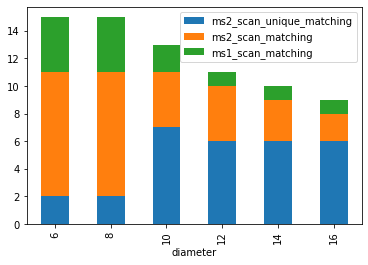

<IPython.core.display.Javascript object>

In [25]:
wf2.plot_scans()

In [26]:
wf2.compute(10, 10)


### compute for diameter 10

file_path /home/yann/Dev/MetWork/Analysis/retrorules-gdr-2021/notebooks/data/rule_burner_output-ea3bdcf4df57d1b4ad666f93fa52bfce.csv
Data loaded from saved file
rule_results : 3639
new_structures : 3497
ms1_matching : 26
ms1_scan_matching : 13
ZXQCHXLLIKMUTB-UHFFFAOYSA-N already fraged
LORXOTCKKVEWGS-UHFFFAOYSA-N already fragedGFYOGCYEIYULHH-UHFFFAOYSA-N already fraged
HLGKHCVGTSTFAJ-UHFFFAOYSA-N already fraged
HLGKHCVGTSTFAJ-UHFFFAOYSA-N already fragedFTPMODVTXJGVCJ-UHFFFAOYSA-N already fragedWNWGDONDVDUXNX-UHFFFAOYSA-N already fraged

IQDPCQNHHMHGJX-UHFFFAOYSA-N already fraged
NXDNDRJNQJPXGJ-UHFFFAOYSA-N already fraged

WDWBIQRRBRJRGX-UHFFFAOYSA-N already fraged

WINFSIMEBFWGGD-UHFFFAOYSA-N already fragedHLNIHBNEBORABM-UHFFFAOYSA-N already fragedBCDTWRBOMGOGTJ-UHFFFAOYSA-N already fraged

KXTZBLZDDWGCCN-UHFFFAOYSA-N already fraged

KENBCTGUCDAUPZ-UHFFFAOYSA-N already fragedCHQDATZRYBRPLL-UHFFFAOYSA-N already fragedPWOFHOJJMWJGLT-UHFFFAOYSA-N already frag

<IPython.core.display.Javascript object>

In [159]:
wf2.create_graph_df()
wf2.create_graph()
wf2.get_tsne_df()
wf2.get_tsne_matrix()
wf2.compute_tsne()
wf2.set_graph_position()
wf2.export_graph(Path("data", "network2.json"))

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 18 / 18
[t-SNE] Mean sigma: 0.095063
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.405350
[t-SNE] KL divergence after 3500 iterations: 0.046223


<IPython.core.display.Javascript object>

In [28]:
df_input3 = (
    wf2.ms2_match.query("scans == '115'")
    .loc[:, ["product_smiles", "scans"]]
    .drop_duplicates()
)
df_input3

product_smiles scans
110  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   115

<IPython.core.display.Javascript object>

In [30]:
df_input3 = wf2.ms2_match.query("scans == '115'")
smiles_step3 = list(df_input3.product_smiles)
scans_step3 = list(df_input3.scans)
sub_data3 = SubstrateData.load_smiles(smiles_step3, scans=scans_step3)
wf3 = Workflow(
    substrate_data=sub_data3,
    data_path="data/sideritis-step2-{diameter}.csv",
    exp_data=exp_data,
    cosine_threshold=0.386,
)
wf3.compute(6, 6)


### compute for diameter 6

load rules from /home/yann/Data/RetroRules/retrorules_rr02_rp3_hs/retrorules_rr02_flat_all.tsv
file_path /home/yann/Dev/MetWork/Analysis/retrorules-gdr-2021/notebooks/data/rule_burner_output-edbba600297a20616b02bf6dc152ba3b.csv
Data loaded from saved file
rule_results : 2258
new_structures : 2258
ms1_matching : 15
ms1_scan_matching : 5
ZCXIVXGDTYTRMO-UHFFFAOYSA-N already fraged
WDNHKCJUMXZVMP-UHFFFAOYSA-N already fraged
FFYJBONLMQRNGY-UHFFFAOYSA-N already fraged
PQCFVMRUYYCCKL-UHFFFAOYSA-N already fraged
PQACCVUSZUPEFU-UHFFFAOYSA-N already fragedPTKNECMMKRDZEG-UHFFFAOYSA-N already fragedBDLZMDAHKPIQKR-UHFFFAOYSA-N already fragedUYNVZCWDKFHOBK-UHFFFAOYSA-N already fragedUYNVZCWDKFHOBK-UHFFFAOYSA-N already fraged

MDNCZYBPULNMBE-UHFFFAOYSA-N already fragedIYZUGPLQECWWEF-UHFFFAOYSA-N already fraged




JBLCPKQRNONPAF-UHFFFAOYSA-N already fragedOSJPPGNTCRNQQC-UHFFFAOYSA-N already fragedZRVOLXSFHRSUTI-UHFFFAOYSA-N already fraged


JNVJEGSYCIVFRF-UHFFFAOYSA-N alr

<IPython.core.display.Javascript object>

In [31]:
wf3.ms2_match

product_inchikeys  \
5    PQCFVMRUYYCCKL-UHFFFAOYSA-N   
6    PTKNECMMKRDZEG-UHFFFAOYSA-N   
7    BDLZMDAHKPIQKR-UHFFFAOYSA-N   
8    PQACCVUSZUPEFU-UHFFFAOYSA-N   
93   JBLCPKQRNONPAF-UHFFFAOYSA-N   
94   ZRVOLXSFHRSUTI-UHFFFAOYSA-N   
134  JNVJEGSYCIVFRF-UHFFFAOYSA-N   

                                        product_smiles scans    cosine  
5    [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   152  0.502610  
6    [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   152  0.494846  
7    [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   152  0.508616  
8    [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   152  0.507119  
93   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   152  0.490817  
94   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   152  0.494733  
134  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   152  0.484575

<IPython.core.display.Javascript object>

In [ ]:
['[H]Oc1c([H])c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C4([H])OC4([H])OC([H])(C([H])([H])OC(=O)C([H])([H])[H])C([H])(O[H])C([H])(O[H])C4([H])O[H])c([H])c(O[H])c3c(=O)c2[H])c1[H]', '[H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C4([H])OC4([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C4([H])O[H])c([H])c(O[H])c3c(=O)c2[H])c([H])c1[H]', '[H]Oc1c(OC2([H])OC([H])(C([H])([H])OC(=O)C([H])([H])[H])C([H])(O[H])C([H])(O[H])C2([H])OC2([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C2([H])O[H])c([H])c(O[H])c2c(=O)c([H])c(-c3c([H])c([H])c(OC([H])([H])[H])c([H])c3[H])oc12', '[H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C([H])([H])OC(=O)C([H])([H])[H])C([H])(O[H])C([H])(O[H])C4([H])OC4([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C4([H])O[H])c([H])c(O[H])c3c(=O)c2[H])c([H])c1O[H]', '[H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C2([H])OC2([H])OC([H])(C([H])([H])OC(=O)C([H])([H])[H])C([H])(O[H])C([H])(O[H])C2([H])O[H])c([H])c(O[H])c2c(=O)c([H])c(-c3c([H])c([H])c(OC([H])([H])[H])c([H])c3[H])oc12', '[H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C([H])([H])OC(=O)C([H])([H])[H])C([H])(O[H])C([H])(O[H])C4([H])OC4([H])OC([H])(C([H])([H])OC(=O)C([H])([H])[H])C([H])(O[H])C([H])(O[H])C4([H])O[H])c([H])c(O[H])c3c(=O)c2[H])c([H])c1[H]', '[H]Oc1c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C4([H])OC4([H])OC([H])(C([H])([H])OC(=O)C([H])([H])[H])C([H])(O[H])C([H])(O[H])C4([H])O[H])c([H])c(O[H])c3c(=O)c2[H])c([H])c([H])c1OC([H])([H])[H]', '[H]Oc1c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C([H])([H])OC(=O)C([H])([H])[H])C([H])(O[H])C([H])(O[H])C4([H])OC4([H])OC([H])(C([H])([H])OC(=O)C([H])([H])[H])C([H])(O[H])C([H])(O[H])C4([H])O[H])c([H])c(O[H])c3c(=O)c2[H])c([H])c([H])c1OC([H])([H])[H]', '[H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C4([H])OC4([H])OC([H])(C([H])([H])OC(=O)C([H])([H])[H])C([H])(O[H])C([H])(O[H])C4([H])O[H])c([H])c(O[H])c3c(=O)c2[H])c([H])c1OC([H])([H])[H]', '[H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C([H])([H])OC(=O)C([H])([H])[H])C([H])(O[H])C([H])(O[H])C4([H])OC4([H])OC([H])(C([H])([H])OC(=O)C([H])([H])[H])C([H])(O[H])C([H])(O[H])C4([H])O[H])c([H])c(O[H])c3c(=O)c2[H])c([H])c1OC([H])([H])[H]', '[H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C4([H])O[H])c([H])c(O[H])c3c(=O)c2[H])c([H])c1[H]']